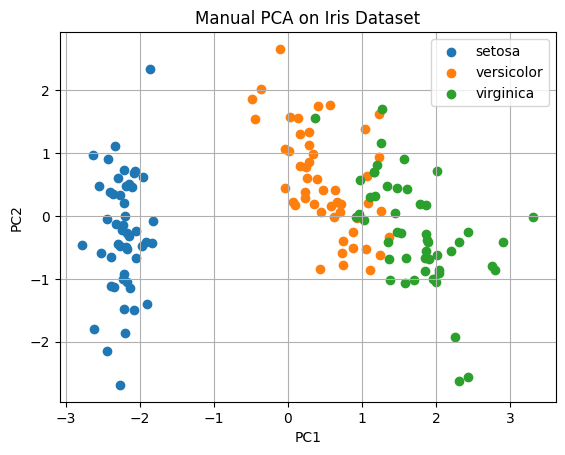

cov[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_iris()
X = data.data
y = data.target
labels = data.target_names

# Standardize
X_std = StandardScaler().fit_transform(X)

# Covariance matrix and eigen decomposition
cov_matrix = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

# Sort by eigenvalues
idx = np.argsort(eigen_vals)[::-1]
top_vecs = eigen_vecs[:, idx[:2]]

# Project to lower dimension
X_pca = X_std @ top_vecs

# Plot
for i, label in enumerate(np.unique(y)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=labels[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Manual PCA on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()
print(f"cov{cov_matrix }")